# Transfer Learning
Example merged from:


    https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html    
    https://towardsdatascience.com/transfer-learning-using-keras-d804b2e04ef8
    https://www.learnopencv.com/image-classification-using-convolutional-neural-networks-in-keras/

## Motivation

Transfer learning focuses on storing knowledge gained while solving one problem and applying it to a different but related problem.

It has the bennifits that 1.The pre trained weights are usually trained on different domains and suitable for broad use. 2. Pre trained weights are available for popular networks. 
In Keras the most commen networks are integrated and pretrained to 1000 picture categories from ImageNet.

-  Xception
-  VGG16
-  VGG19
-  ResNet50
-  InceptionV3
-  InceptionResNetV2
-  MobileNet
-  NASNet

See also API: https://keras.io/applications/

## VGG16





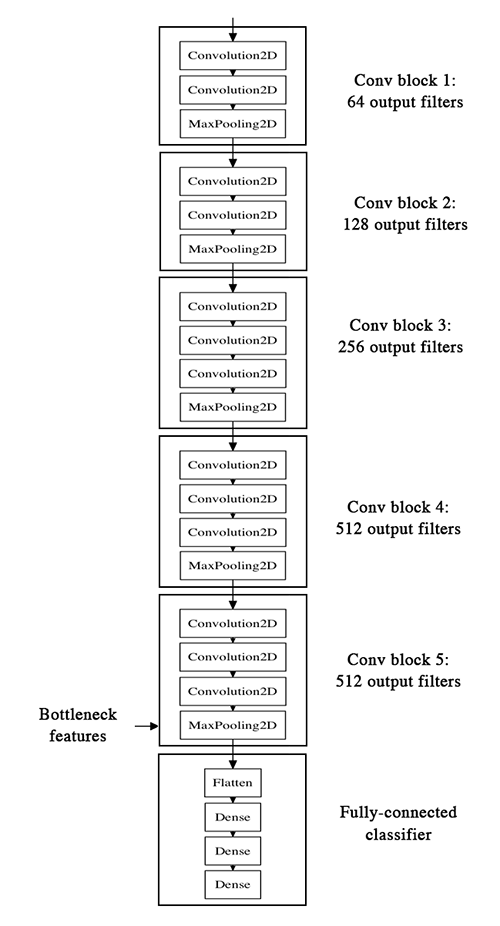


## Training

In [3]:
import numpy as np
from keras import applications, optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
import pickle
from IPython.display import clear_output
import matplotlib.pyplot as plt

Using TensorFlow backend.


General settings

In [1]:
# dimensions of our images.
img_width, img_height = 150, 150

top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = 'tmp/train'
validation_data_dir = 'tmp/validation'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

### Add Classifier on top of VGG16 and train

In [13]:
def save_bottleneck_features():
    datagen = ImageDataGenerator(rescale=1. / 255)

    # build the VGG16 network
    model = applications.VGG16(include_top=False, weights='imagenet')

    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    bottleneck_features_train = model.predict_generator(
        generator, nb_train_samples//batch_size)
    np.save(open('bottleneck_features_train.npy', 'wb'),
            bottleneck_features_train)

    generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    bottleneck_features_validation = model.predict_generator(
        generator,  nb_validation_samples // batch_size)
    np.save(open('bottleneck_features_validation.npy', 'wb'),
            bottleneck_features_validation)


def train_top_model():
    train_data = np.load(open('bottleneck_features_train.npy','rb'))
    train_labels = np.array( [0] * (nb_train_samples // 2) + [1] * (nb_train_samples // 2))

    validation_data = np.load(open('bottleneck_features_validation.npy','rb'))
    validation_labels = np.array([0] * (nb_validation_samples // 2) + [1] * (nb_validation_samples // 2))


    model = Sequential()
    model.add(Flatten(input_shape=train_data.shape[1:]))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    print(len(model.layers))
    print(model.)
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(train_data, train_labels,
              epochs=epochs,
              batch_size=batch_size,
              validation_data=(validation_data, validation_labels))
    model.save_weights(top_model_weights_path)


#Train top level
save_bottleneck_features()
train_top_model()


NameError: name 'model' is not defined

In [1]:
trainedModel.layers_by_depth gives:

{0: [<keras.models.Sequential at 0x7f88bb4b89e8>],
 1: [<keras.layers.pooling.MaxPooling2D at 0x7f88bb5142b0>],
 2: [<keras.layers.convolutional.Conv2D at 0x7f88bb502320>],
 3: [<keras.layers.convolutional.Conv2D at 0x7f88bb4e0f98>],
 4: [<keras.layers.convolutional.Conv2D at 0x7f88bb4e09b0>],
 5: [<keras.layers.pooling.MaxPooling2D at 0x7f88bb53b668>],
 6: [<keras.layers.convolutional.Conv2D at 0x7f88bb59a908>],
 7: [<keras.layers.convolutional.Conv2D at 0x7f88bb589b70>],
 8: [<keras.layers.convolutional.Conv2D at 0x7f88bb577828>],
 9: [<keras.layers.pooling.MaxPooling2D at 0x7f88bb5d2400>],
 10: [<keras.layers.convolutional.Conv2D at 0x7f88bb5c2400>],
 11: [<keras.layers.convolutional.Conv2D at 0x7f88bb5a1cc0>],
 12: [<keras.layers.convolutional.Conv2D at 0x7f88bb5a1a90>],
 13: [<keras.layers.pooling.MaxPooling2D at 0x7f88bb5fd748>],
 14: [<keras.layers.convolutional.Conv2D at 0x7f88bb5de518>],
 15: [<keras.layers.convolutional.Conv2D at 0x7f88bb5deef0>],
 16: [<keras.layers.pooling.MaxPooling2D at 0x7f88bca70748>],
 17: [<keras.layers.convolutional.Conv2D at 0x7f88bca706d8>],
 18: [<keras.layers.convolutional.Conv2D at 0x7f88bca700f0>],
 19: [<keras.engine.topology.InputLayer at 0x7f88bb626e10>]}

SyntaxError: invalid syntax (<ipython-input-1-13dc48d193dc>, line 1)

Found 2000 images belonging to 2 classes.

Found 801 images belonging to 2 classes.

Train on 2000 samples, validate on 800 samples

Epoch 1/50
2000/2000 [==============================] - 1s 321us/step - loss: 0.6817 - acc: 0.7505 - val_loss: 0.4830 - val_acc: 0.7575

Epoch 2/50
2000/2000 [==============================] - 1s 266us/step - loss: 0.3589 - acc: 0.8575 - val_loss: 0.2738 - val_acc: 0.8850

Epoch 3/50
2000/2000 [==============================] - 1s 257us/step - loss: 0.3109 - acc: 0.8655 - val_loss: 0.2734 - val_acc: 0.8875

...

Epoch 47/50
2000/2000 [==============================] - 1s 264us/step - loss: 0.0254 - acc: 0.9955 - val_loss: 1.0044 - val_acc: 0.8850

Epoch 48/50
2000/2000 [==============================] - 1s 260us/step - loss: 0.0141 - acc: 0.9960 - val_loss: 1.0697 - val_acc: 0.8912

Epoch 49/50
2000/2000 [==============================] - 1s 273us/step - loss: 0.0104 - acc: 0.9980 - val_loss: 1.0777 - val_acc: 0.8788

Epoch 50/50
2000/2000 [==============================] - 1s 275us/step - loss: 0.0107 - acc: 0.9965 - val_loss: 1.0210 - val_acc: 0.8862

### Train from top to bottom

In [ ]:
#deducing in-, output and on-top layer vgg16 is made out of 5 blocks with 18 layers. below list marks at what position
#a block begins
blocks=[18, 14, 10, 6, 3, 0]

def trainVGG16(vgg16Weights,augumentation, i):    
    
    #do not use pre trained weights if vgg16Weights is FALSE
    if vgg16Weights:
        model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
        useWeight='Weights'
    else:
        model = applications.VGG16(include_top=False, input_shape=(150, 150, 3))
        useWeight='NoWeights'
    print('Model loaded.')

    # build a classifier model to put on top of the convolutional model
    top_model = Sequential()
    top_model.add(Flatten(input_shape=model.output_shape[1:]))
    top_model.add(Dense(256, activation='relu'))
    top_model.add(Dropout(0.5))
    top_model.add(Dense(1, activation='sigmoid'))

    # note that it is necessary to start with a fully-trained
    # classifier, including the top classifier,
    # in order to successfully do fine-tuning
    top_model.load_weights(top_model_weights_path)

    # add the model on top of the convolutional base
    model = Model(inputs=model.input, outputs=top_model(model.output))#model.add(top_model)

    # set the first 25 layers (up to the last conv block)
    # to non-trainable (weights will not be updated)
    for layer in model.layers[:i]:
        layer.trainable = False
    
    #print("layers "+str(len(model.layers)))
    #print("layers "+str(model.layers))
    

    # compile the model with a SGD/momentum optimizer
    # and a very slow learning rate.
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
                  metrics=['accuracy'])

    # prepare data augmentation configuration
    train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

    test_datagen = ImageDataGenerator(rescale=1. / 255)

    #do not sample additional pictures if augumenation is FALSE
    if (augumentation):
        train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
        useAug='Augumentation'
    else:
        train_datagen = ImageDataGenerator(rescale=1. / 255)
        useAug='NoAugumentation'

    currentModel='vgg16_'+useWeight+'_'+useAug+'_trainedLast_'+str(18-i)
    print('Do '+currentModel)        
    train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')
    validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')    

    checkpoint = ModelCheckpoint(currentModel+'_Layers_.h5', monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
    
    #stop current run after xx epochs without acc increase - set to 50 to achive nice graphic comparsion
    early = EarlyStopping(monitor='val_acc', min_delta=0, patience=15, verbose=1, mode='auto')        

    # fine-tune the model
    hist=model.fit_generator(
        train_generator,
        samples_per_epoch=nb_train_samples,
        epochs=epochs,
        validation_data=validation_generator,
        nb_val_samples=nb_validation_samples,
        callbacks = [checkpoint, early])
    #Save History        
    with open('hist_'+currentModel, 'wb') as file_pi:
        pickle.dump(hist.history, file_pi)
        
    clear_output(wait=True)
    
            
#train the network with and without weights, with and without augumgentation and for all blocks
for i in blocks:    
    trainVGG16(True,True,i)
    trainVGG16(False,True,i)
    trainVGG16(False,False,i)
    trainVGG16(True,False,i)
    

Result of 6 x 4 weight and corresponding history files saved localy:

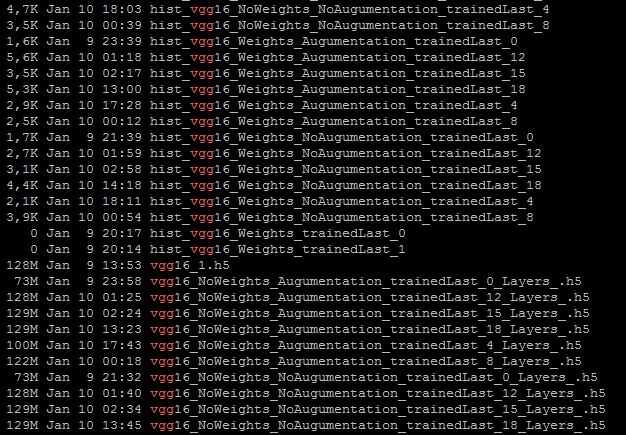

## Evaluation

Summary for each run

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


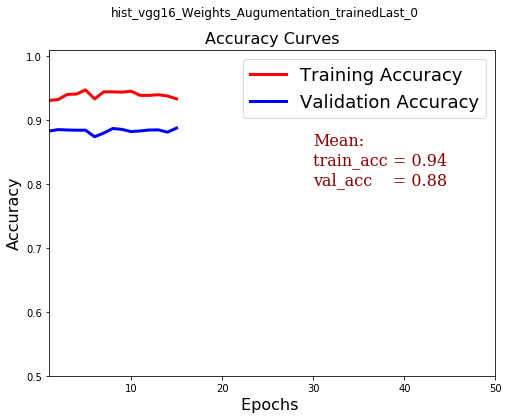

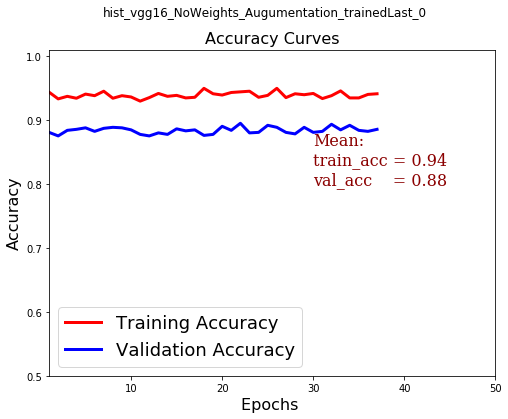

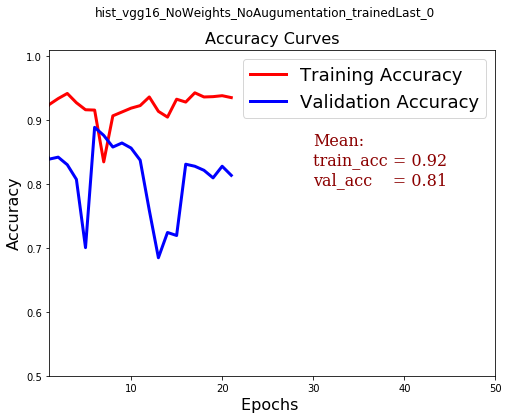

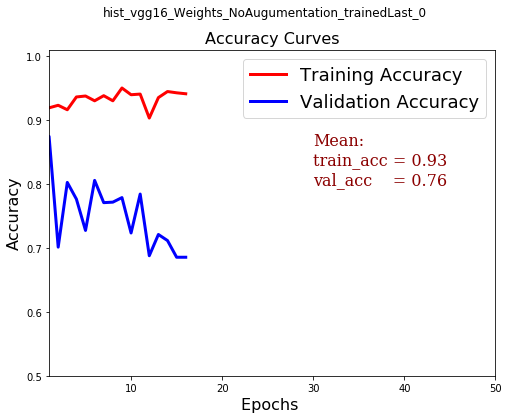

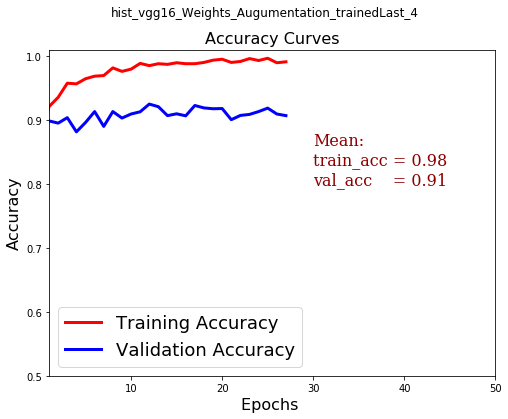

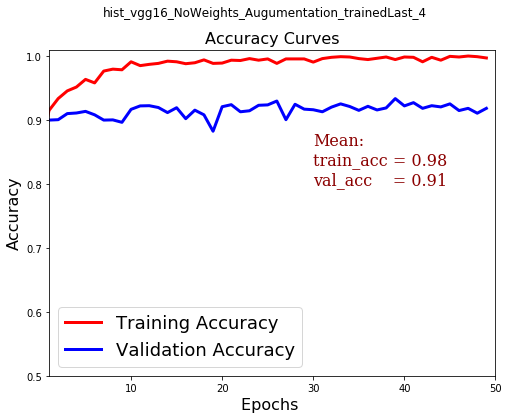

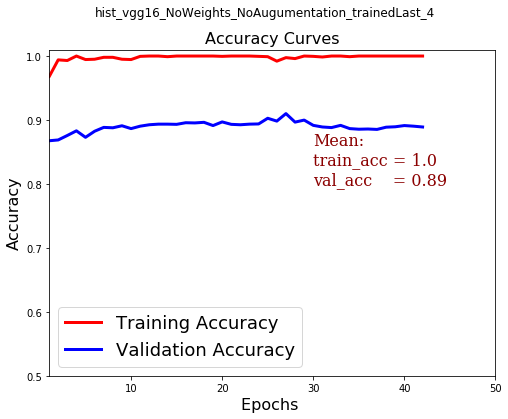

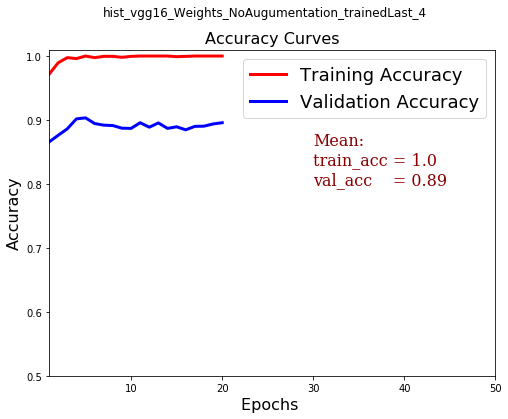

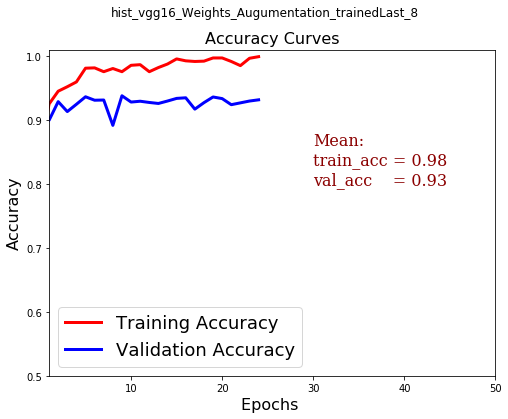

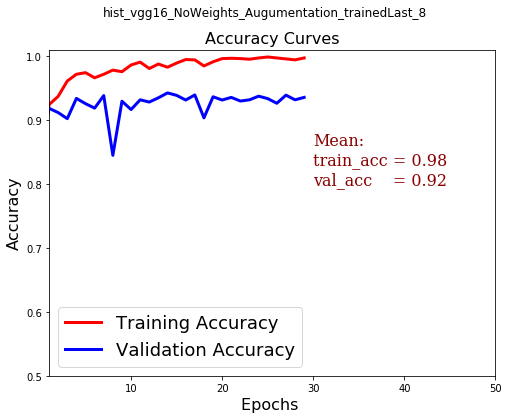

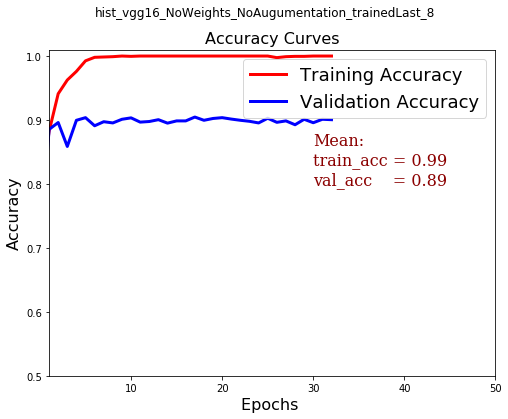

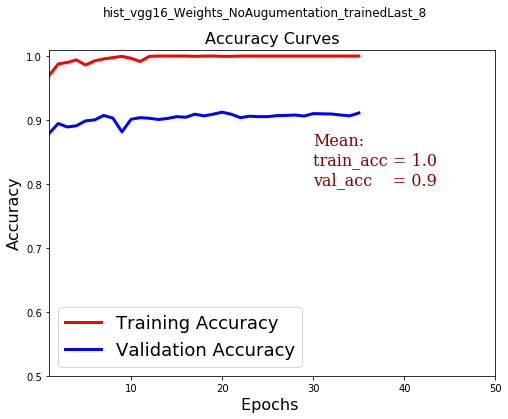

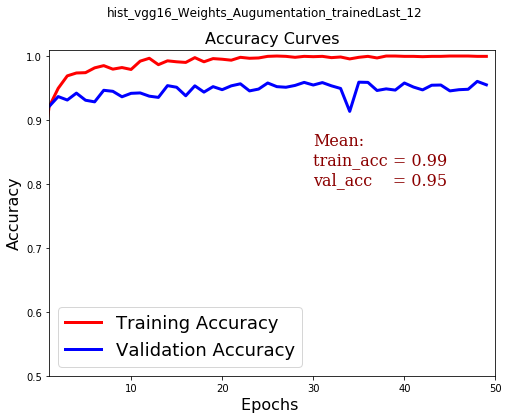

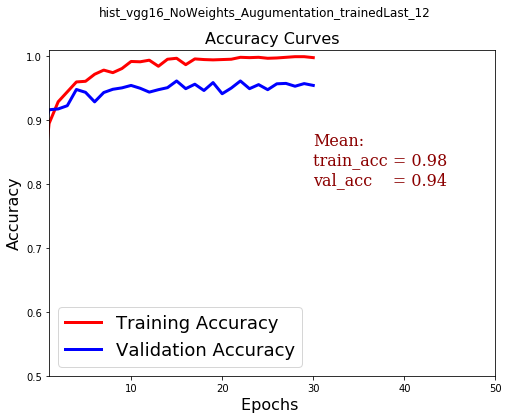

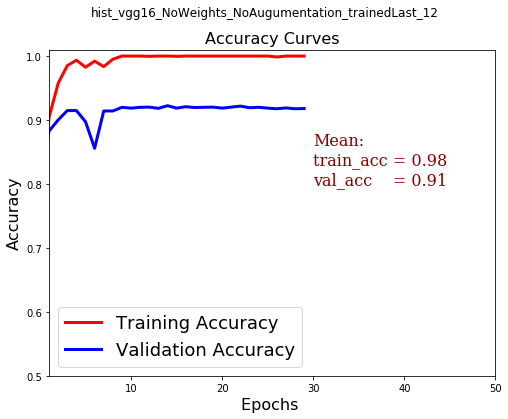

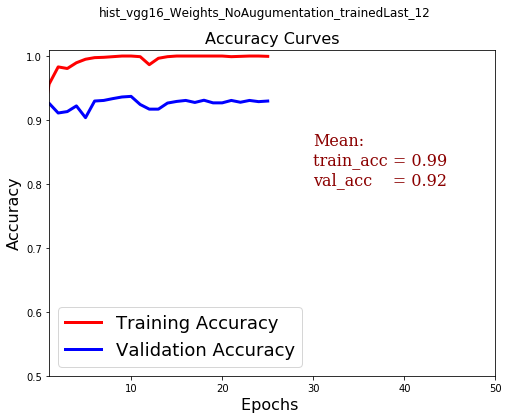

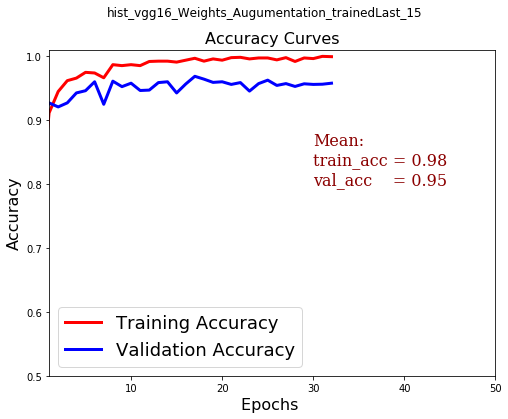

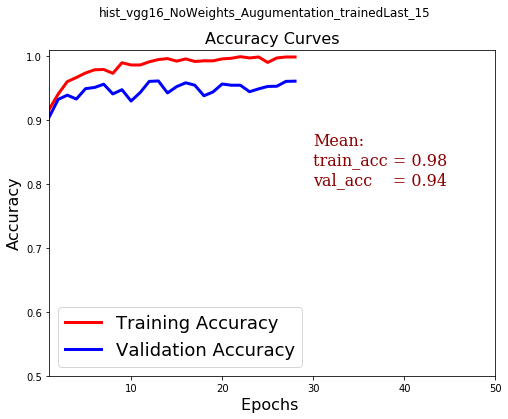

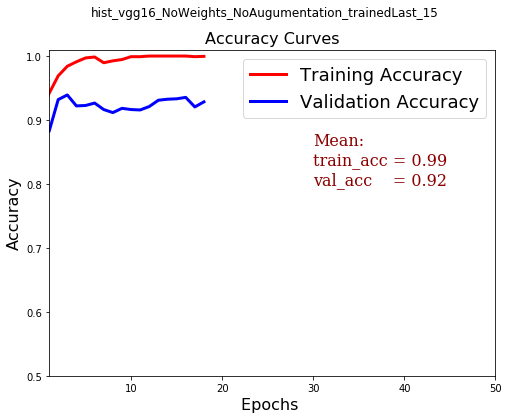

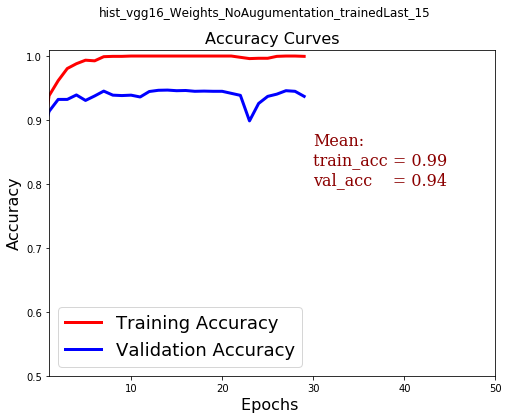

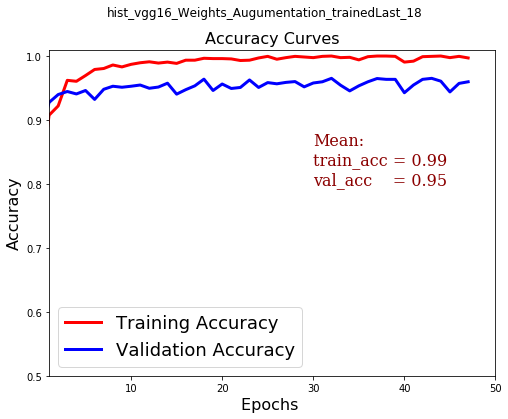

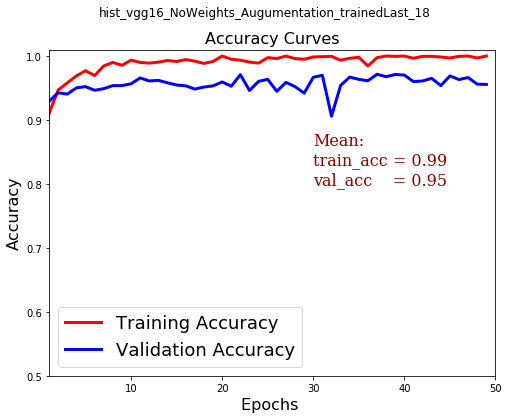

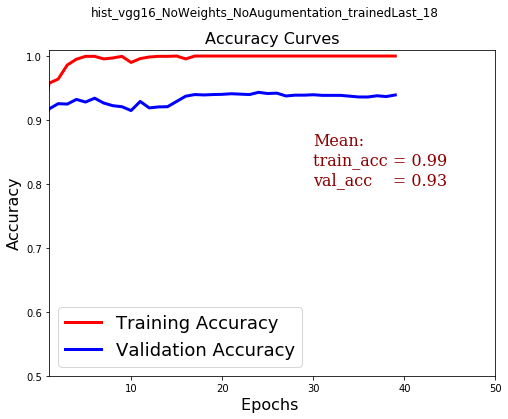

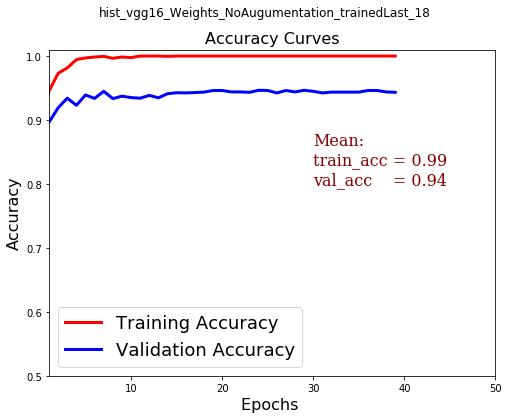

In [8]:
filePre='hist_vgg16_'
aug='Augumentation_'
noAug='NoAugumentation_'
noWei='NoWeights_'
wei='Weights_'
trained='trainedLast_'
blocks=[18, 14, 10, 6, 3, 0]

def showHistory(history):
    font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
    
    accMean=sum(history['acc'])/len(history['acc'])
    val_accMean=sum(history['val_acc'])/len(history['val_acc'])    
    means="Mean:\ntrain_acc = "+str(round(accMean,2))+'\n'+"val_acc    = "+str(round(val_accMean,2))
    
    #print(means)
    #plt.figure(figsize=[8,6])
    #plt.plot(history['loss'],'r',linewidth=3.0)
    #plt.plot(history['val_loss'],'b',linewidth=3.0)
    #plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    #plt.xlabel('Epochs ',fontsize=16)
    #plt.ylabel('Loss',fontsize=16)
    #plt.title('Loss Curves',fontsize=16)
    #plt.axis((1,50,0.0,1))
    #plt.suptitle(file)

    # Accuracy Curves
    plt.figure(figsize=[8,6])
    plt.plot(history['acc'],'r',linewidth=3.0)
    plt.plot(history['val_acc'],'b',linewidth=3.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)
    plt.axis((1,50,0.5,1.01))
    plt.text(30,0.8,means,fontdict=font)
    
    plt.suptitle(file)
    
for i in blocks:
    file=filePre+wei+aug+trained+str(18-i)
    history = np.load(open(file,'rb'))
    showHistory(history)
    file=filePre+noWei+aug+trained+str(18-i)
    history = np.load(open(file,'rb'))
    showHistory(history)
    file=filePre+noWei+noAug+trained+str(18-i)
    history = np.load(open(file,'rb'))
    showHistory(history)
    file=filePre+wei+noAug+trained+str(18-i)
    history = np.load(open(file,'rb'))
    showHistory(history)
    


Summarize summaries

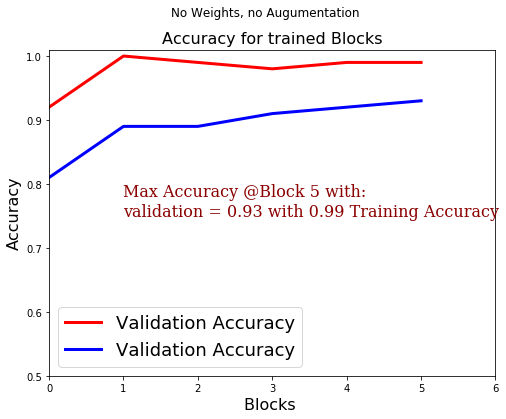

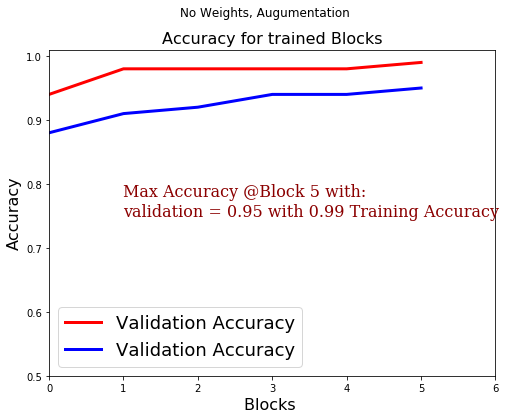

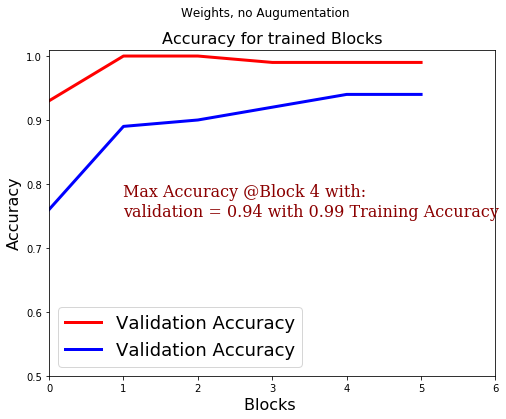

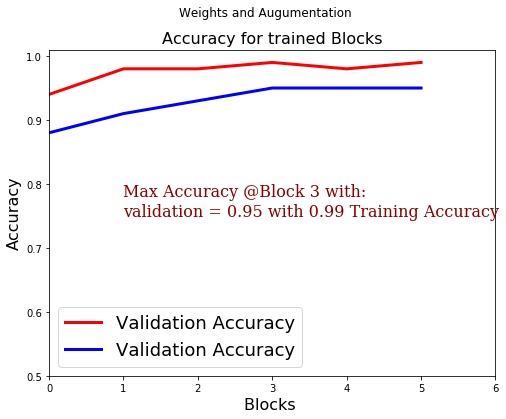

In [11]:
summaryTrainAcc=[]
summaryValAcc=[]

summaryBlocks={'BlockTrain':[],
              'BlockVal':[]}

def prepareSummary(fileType, subtitle):
    for i in blocks:
        file=fileType+str(18-i)
        history = np.load(open(file,'rb'))
        accMean=sum(history['acc'])/len(history['acc'])
        val_accMean=sum(history['val_acc'])/len(history['val_acc'])    
        summaryBlocks['BlockTrain'].append(round(accMean,2))
        summaryBlocks['BlockVal'].append(round(val_accMean,2))
    plotSummary(summaryBlocks,subtitle)
    
    #reset dict for next run
    summaryBlocks['BlockTrain']=[]
    summaryBlocks['BlockVal']=[]



def plotSummary(history, subtitle):
    font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
    #get mac validation accuracy for this run and corosponding train result
    maxValAccIndex=np.argmax(history['BlockVal'])
    maxValAcc = np.take(history['BlockVal'],maxValAccIndex)
    maxValTrain = np.take(history['BlockTrain'],maxValAccIndex)
    maxResult='Max Accuracy @Block '+str(maxValAccIndex)+' with:\nvalidation = '+str(maxValAcc)+' with '+str(maxValTrain)+' Training Accuracy'
    
    accMean=sum(history['BlockTrain'])/len(history['BlockTrain'])
    val_accMean=sum(history['BlockVal'])/len(history['BlockVal'])    
    means="Mean:\ntrain_acc = "+str(round(accMean,2))+'\n'+"val_acc    = "+str(round(val_accMean,2))
    
    plt.figure(figsize=[8,6])
    plt.plot(history['BlockTrain'],'r',linewidth=3.0)
    plt.plot(history['BlockVal'],'b',linewidth=3.0)
    plt.legend(['Validation Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Blocks ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)

    plt.suptitle(subtitle)
    plt.title('Accuracy for trained Blocks',fontsize=16)
    plt.axis((0,6,0.5,1.01))
    plt.text(1,0.75,maxResult,fontdict=font)

#call the summaries
prepareSummary(filePre+noWei+noAug+trained, "No Weights, no Augumentation")
prepareSummary(filePre+noWei+aug+trained, "No Weights, Augumentation")
prepareSummary(filePre+wei+noAug+trained, "Weights, no Augumentation")
prepareSummary(filePre+wei+aug+trained, "Weights and Augumentation")

Finally test model that trained best

In [19]:
import numpy as np
datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = datagen.flow_from_directory(
        'tmp/test',
        target_size=(150, 150),
        batch_size=1)
def getTestModel(weightFile):
    
    
    model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    
    top_model = Sequential()
    top_model.add(Flatten(input_shape=model.output_shape[1:]))
    top_model.add(Dense(256, activation='relu'))
    top_model.add(Dropout(0.5))
    top_model.add(Dense(1, activation='sigmoid'))

    # add the model on top of the convolutional base
    test_model = Model(inputs=model.input, outputs=top_model(model.output))#model.add(top_model)
    test_model.load_weights(weightFile)
    test_model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),metrics=['accuracy'])
    
    return test_model
trainedModel=getTestModel('vgg16_Weights_Augumentation_trainedLast_18_Layers_.h5')
prediction=trainedModel.predict_generator(test_generator,662)

print('test accuracy: '+str(np.sum(prediction)/len(prediction)))

Found 662 images belonging to 2 classes.
test accuracy: 0.842459226303


### Findings

-  best and fastest result was found with pretrained weights from imagenet and augumentation
-  according to this results it is useful to retrain deeper layers in cnn instead of just the top-layer
-  also good results without using the pretrained weights and augumentation. But you have to retrain deeper layers of network, what reasons the origin idea of Transfer Learning
-  you see slightly increasing spread between validation and train accuracy the deeper you retrain (better visible if you activate loss plots) the network. This could indicate a tendency to overfitt on deeper retrain.
-  Maybe this tendency is fostered by relativly small sample size of 2000
-  Train the full network instead of top layer costs around the double